In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

file_path = '/content/drive/MyDrive/weather/weatherHistory.csv'
df = pd.read_csv(file_path)

print("Dataset Columns:", df.columns)
print(df.head())


Dataset Columns: Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89          

In [3]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df = df.sort_values('Formatted Date')
temperature = df['Temperature (C)'].dropna()

print(f"Data points in temperature: {len(temperature)}")


Data points in temperature: 96453


/tmp/ipython-input-788397619.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


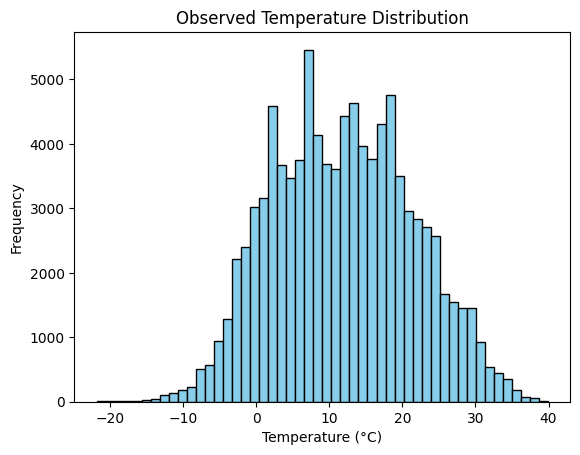

In [4]:
plt.hist(temperature, bins=50, color='skyblue', edgecolor='black')
plt.title('Observed Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [5]:
mean_temp = temperature.mean()
std_temp = temperature.std()
print(f"Mean Temperature: {mean_temp:.2f} °C")
print(f"Std Dev Temperature: {std_temp:.2f} °C")


Mean Temperature: 11.93 °C
Std Dev Temperature: 9.55 °C


In [6]:
num_simulations = 10000
simulated_temps = np.random.normal(loc=mean_temp, scale=std_temp, size=num_simulations)


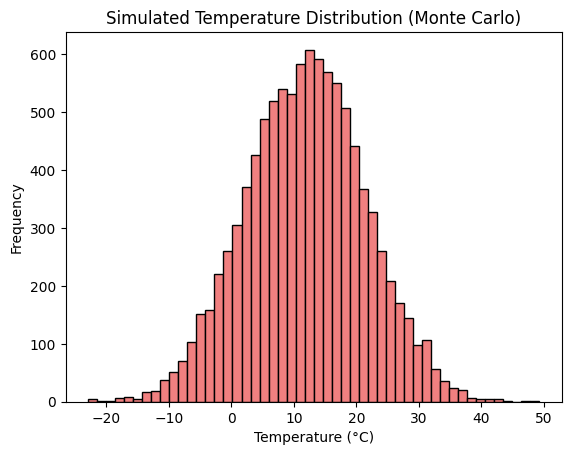

In [7]:
plt.hist(simulated_temps, bins=50, color='lightcoral', edgecolor='black')
plt.title('Simulated Temperature Distribution (Monte Carlo)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


In [9]:
observed_counts, bins = np.histogram(temperature, bins=20)
simulated_counts, _ = np.histogram(simulated_temps, bins=bins)

# Normalize the simulated counts to match the sum of observed counts
simulated_counts = simulated_counts * (observed_counts.sum() / simulated_counts.sum())

observed_counts += 1
simulated_counts += 1


chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=simulated_counts)

print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value > alpha:
    print("✅ Fail to reject null hypothesis: simulated distribution fits observed data.")
else:
    print("❌ Reject null hypothesis: simulated distribution does NOT fit observed data.")

Chi-Square Statistic: 3752.2468
P-value: 0.0000
❌ Reject null hypothesis: simulated distribution does NOT fit observed data.


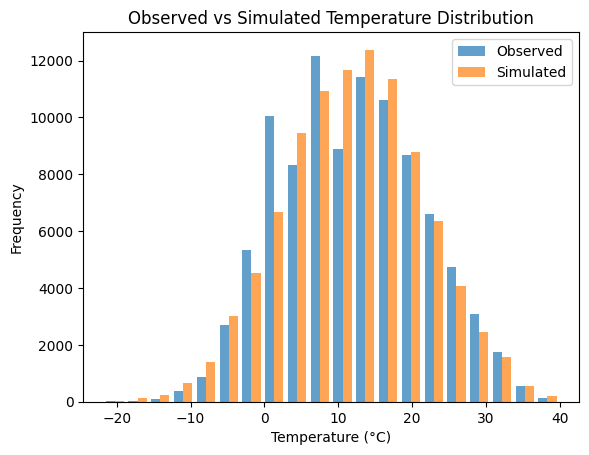

In [10]:
import matplotlib.ticker as mtick

bin_centers = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.4

plt.bar(bin_centers - width/2, observed_counts, width=width, label='Observed', alpha=0.7)
plt.bar(bin_centers + width/2, simulated_counts, width=width, label='Simulated', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Observed vs Simulated Temperature Distribution')
plt.legend()
plt.show()
